Package Import


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

Data Import

In [2]:
kidney = pd.read_csv("/content/kidney.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd



Data Preprocessing

In [3]:
kidney.shape

(400, 26)

In [4]:
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'class'},inplace=True)
kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [5]:
kidney.shape

(400, 25)

In [6]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

<Axes: xlabel='rbc'>

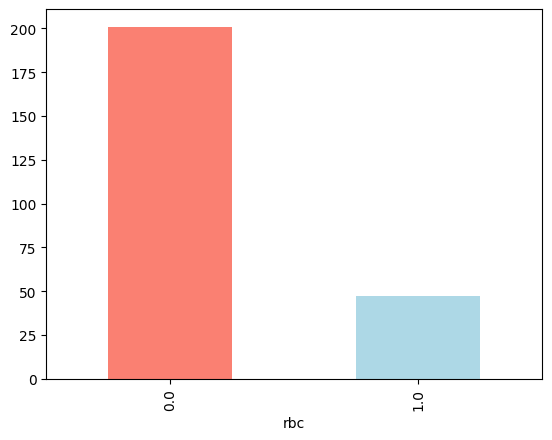

In [7]:
kidney.rbc.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
kidney.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
kidney.fillna(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,0.0,1.0,...,38,6000,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<ipython-input-11-c946c6315fbb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0], color='y')
<ipython-input-11-c946c6315fbb>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


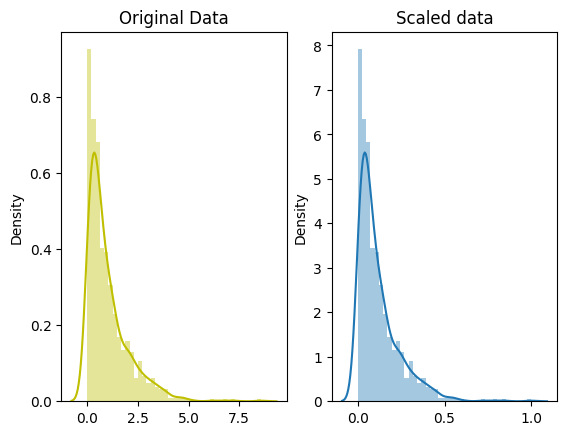

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

np.random.seed(0)

original_data = np.random.exponential(size = 1000)

scaled_data = minmax_scale(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'bp', 'sg']
kidney[col_to_scale] = s_sc.fit_transform(kidney[col_to_scale])

In [14]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-2.594124,-1.936857,0.454071,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.613295,0.258373,-1.297699,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.203139,-0.473370,-2.173584,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
from sklearn.model_selection import train_test_split

X = kidney.drop('rbc', axis=1)
y = kidney.rbc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
kidney.dropna()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,-0.203139,-0.473370,-2.173584,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,0.088445,0.990117,0.454071,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,0.671612,-0.473370,-1.297699,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,0.963195,0.258373,-1.297699,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,0.554978,0.258373,-0.421814,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,-0.553039,-0.473370,1.329955,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,-2.302541,0.258373,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,-2.010957,-1.205114,1.329955,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
kidney2 = kidney.dropna()
print(kidney2.shape)

(158, 25)


In [46]:
print(kidney2.groupby('class').bp.max())

class
0.0    0.258373
1.0    2.453604
Name: bp, dtype: float64


Data Modelling

In [47]:
X_train, X_test, y_train, y_test = train_test_split(kidney2.iloc[:,:-1], kidney2['class'], test_size=0.33, random_state=44, stratify= kidney2['class'])

In [60]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
317,0.380028,-0.473370,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,102.0,...,15.0,40,8100,4.9,0.0,0.0,0.0,1.0,0.0,0.0
296,-0.611356,-0.473370,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,16.8,41,6300,5.9,0.0,0.0,0.0,1.0,0.0,0.0
157,0.613295,-0.473370,1.329955,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,12.6,39,7900,3.9,1.0,1.0,0.0,1.0,0.0,0.0
258,-0.553039,0.258373,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,98.0,...,13.9,44,8400,5.5,0.0,0.0,0.0,1.0,0.0,0.0
291,-0.261456,0.258373,1.329955,0.0,0.0,0.0,0.0,0.0,0.0,124.0,...,14.9,41,7000,5.7,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.380028,0.258373,0.454071,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,14.0,50,6700,6.5,0.0,0.0,0.0,1.0,0.0,0.0
389,-0.611356,0.258373,1.329955,0.0,0.0,0.0,0.0,0.0,0.0,112.0,...,17.0,52,7200,5.8,0.0,0.0,0.0,1.0,0.0,0.0
128,0.030128,0.990117,-0.421814,4.0,3.0,0.0,1.0,0.0,0.0,224.0,...,8.1,23,5000,2.9,1.0,1.0,0.0,1.0,0.0,1.0
71,-0.319772,-1.205114,-1.297699,1.0,0.0,0.0,0.0,0.0,0.0,163.0,...,9.8,28,14600,3.2,1.0,1.0,0.0,1.0,0.0,0.0


In [61]:
y_train

317    0.0
296    0.0
157    1.0
258    0.0
291    0.0
      ... 
325    0.0
389    0.0
128    1.0
71     1.0
254    0.0
Name: class, Length: 105, dtype: float64

In [48]:
print(X_train.shape)

(105, 24)


In [49]:
y_train.value_counts()

class
0.0    76
1.0    29
Name: count, dtype: int64

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        53
   macro avg       0.99      0.96      0.98        53
weighted avg       0.98      0.98      0.98        53



In [53]:
predictions

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0.])

In [54]:
print(confusion_matrix(y_test,predictions))

[[39  0]
 [ 1 13]]


In [65]:
accuracy_score( y_test, predictions)

0.9811320754716981

Sample Dataset

In [66]:
import pandas as pd

# Create a sample input with random values
sample_input = pd.DataFrame({
    'age': [50],            # Example age
    'bp': [70],             # Example blood pressure
    'sg': [1.025],          # Example specific gravity
    'al': [0],              # Example albumin
    'su': [0],              # Example sugar
    'rbc': [0],             # Example red blood cells (0 for normal, 1 for abnormal)
    'pc': [1],              # Example pus cell (0 for normal, 1 for abnormal)
    'pcc': [0],             # Example pus cell clumps (0 for not present, 1 for present)
    'ba': [0],              # Example bacteria (0 for not present, 1 for present)
    'bgr': [120],           # Example blood glucose random
    'bu': [30],             # Example blood urea
    'sc': [0.8],            # Example serum creatinine
    'sod': [145],           # Example sodium
    'pot': [4.2],           # Example potassium
    'hemo': [15],           # Example hemoglobin
    'pcv': [40],            # Example packed cell volume
    'wc': [8000],           # Example white blood cell count
    'rc': [4.5],            # Example red blood cell count
    'htn': [1],             # Example hypertension (0 for no, 1 for yes)
    'dm': [0],              # Example diabetes mellitus (0 for no, 1 for yes)
    'cad': [0],             # Example coronary artery disease (0 for no, 1 for yes)
    'appet': [1],           # Example appetite (0 for poor, 1 for good)
    'pe': [0],              # Example pedal edema (0 for no, 1 for yes)
    'ane': [0]             # Example anemia (0 for no, 1 for yes)
})

# Display the sample input
print("Sample Input:")
print(sample_input)



Sample Input:
   age  bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv    wc   rc  \
0   50  70  1.025   0   0    0   1    0   0  120  ...    15   40  8000  4.5   

   htn  dm  cad  appet  pe  ane  
0    1   0    0      1   0    0  

[1 rows x 24 columns]


In [67]:
# Use the trained logistic regression model to predict on the sample input data
sample_prediction = logmodel.predict(sample_input)

# Print the predicted output
print("Predicted Output:")
print("Kidney Disease Detected" if sample_prediction[0] == 1 else "No Kidney Disease Detected")


Predicted Output:
No Kidney Disease Detected


In [68]:
import pandas as pd

# Create a sample dataset
sample_input_kidney_disease_2 = pd.DataFrame({
    'age': [55],            # Middle-aged
    'bp': [140],            # Elevated blood pressure
    'sg': [1.015],          # Slightly decreased specific gravity
    'al': [2],              # Increased albumin
    'su': [1],              # Elevated sugar levels
    'rbc': [1],             # Abnormal red blood cells
    'pc': [1],              # Abnormal pus cells
    'pcc': [1],             # Presence of pus cell clumps
    'ba': [1],              # Presence of bacteria
    'bgr': [180],           # Elevated blood glucose
    'bu': [70],             # Elevated blood urea levels
    'sc': [2.0],            # Increased serum creatinine
    'sod': [135],           # Normal sodium levels
    'pot': [5.2],           # Slightly elevated potassium levels
    'hemo': [10],           # Decreased hemoglobin
    'pcv': [30],            # Normal packed cell volume
    'wc': [10000],          # Elevated white blood cell count
    'rc': [3.6],            # Normal red blood cell count
    'htn': [1],             # Hypertension present
    'dm': [1],              # Diabetes mellitus present
    'cad': [1],             # Coronary artery disease present
    'appet': [0],           # Poor appetite
    'pe': [1],              # Presence of pedal edema
    'ane': [1]              # Presence of anemia
})

# Display the sample input for kidney disease detection
print("Sample Input for Kidney Disease Detection:")
print(sample_input)


Sample Input for Kidney Disease Detection:
   age  bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv    wc   rc  \
0   50  70  1.025   0   0    0   1    0   0  120  ...    15   40  8000  4.5   

   htn  dm  cad  appet  pe  ane  
0    1   0    0      1   0    0  

[1 rows x 24 columns]


In [69]:
# Use the trained logistic regression model to predict on the sample input data
sample_prediction = logmodel.predict(sample_input)

# Print the predicted output
print("Predicted Output:")
print("Kidney Disease Detected" if sample_prediction[0] == 0 else "No Kidney Disease Detected")

Predicted Output:
Kidney Disease Detected
